In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests


<IPython.core.display.Javascript object>

In [4]:
data_url = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv"
df = pd.read_csv(data_url)

<IPython.core.display.Javascript object>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


<IPython.core.display.Javascript object>

In [27]:
df.head(8)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,id_co
0,CH,5,6,3,3,10,5,8,5,4,2,60,1,CH5
1,CH,25,6,6,5,7,5,9,3,2,2,59,1,CH25
2,CH,26,6,1,8,8,8,7,6,3,1,24,2,CH26
3,CH,28,6,4,6,6,7,10,6,2,2,64,1,CH28
4,CH,29,6,5,6,7,5,8,7,2,2,55,1,CH29
5,CH,40,6,3,0,5,2,0,2,2,1,76,1,CH40
6,CH,41,6,2,4,5,3,10,5,2,2,30,1,CH41
7,CH,51,6,2,8,8,8,9,6,4,2,84,2,CH51


<IPython.core.display.Javascript object>

In [11]:
df.idno.value_counts().describe()

count    3076.000000
mean        2.648570
std         1.222965
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         8.000000
Name: idno, dtype: float64

<IPython.core.display.Javascript object>

In [28]:
df[df["idno"] == 2102]


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,id_co
514,CH,2102,6,5,5,7,5,8,5,3,1,55,1,CH2102
1255,CH,2102,7,0,7,7,8,8,3,2,2,68,2,CH2102
2032,CZ,2102,6,5,4,7,3,8,4,3,1,43,1,CZ2102
2633,CZ,2102,7,6,2,4,2,7,4,3,1,39,1,CZ2102
3537,ES,2102,6,5,6,7,7,8,7,2,2,36,1,ES2102
4685,ES,2102,7,7,2,2,2,4,5,2,1,64,1,ES2102
6931,SE,2102,6,5,7,7,6,7,6,3,1,44,2,SE2102
7799,SE,2102,7,2,9,9,5,9,5,3,2,43,1,SE2102


<IPython.core.display.Javascript object>

In [25]:
df["id_co"] = df["cntry"] + df["idno"].astype(str)

<IPython.core.display.Javascript object>

In [26]:
df.head(3)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner,id_co
0,CH,5,6,3,3,10,5,8,5,4,2,60,1,CH5
1,CH,25,6,6,5,7,5,9,3,2,2,59,1,CH25
2,CH,26,6,1,8,8,8,7,6,3,1,24,2,CH26


<IPython.core.display.Javascript object>

**1. Did people become less trusting from 2012 to 2014?**


In [13]:
df_14 = df[df["year"] == 7]
df_12 = df[df["year"] == 6]

<IPython.core.display.Javascript object>

In [14]:
trust_14 = df_14["ppltrst"]
trust_12 = df_12["ppltrst"]

<IPython.core.display.Javascript object>

In [15]:
#print(stats.shapiro(trust_12))
#print(stats.shapiro(trust_14))

(0.9520939588546753, 1.4426241793085802e-34)
(0.9580563902854919, 9.222525335052542e-33)


<IPython.core.display.Javascript object>

let's look at the plots:

(array([109.,  88., 224., 326., 369., 826., 516., 759., 625., 234.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

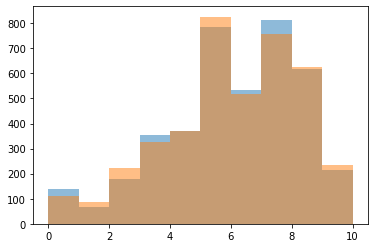

<IPython.core.display.Javascript object>

In [16]:
plt.hist(trust_12, alpha=0.5)
plt.hist(trust_14, alpha=0.5)

Pivot the dataframe so we can pair id variables and find the difference from 2012 to 2014:

In [52]:
df["year"] = df["year"].astype(str)
trust_pivot = df.pivot(index="id_co", columns="year", values="ppltrst")

<IPython.core.display.Javascript object>

In [60]:
trust_pivot = trust_pivot.dropna()

<IPython.core.display.Javascript object>

The difference, looks pretty normal:

In [85]:
trust_pivot["diff"] = trust_pivot["6"] - trust_pivot["7"]


/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [86]:
trust_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3877 entries, CH1001 to SE997
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       3877 non-null   float64
 1   7       3877 non-null   float64
 2   diff    3877 non-null   float64
dtypes: float64(3)
memory usage: 281.2+ KB


<IPython.core.display.Javascript object>

In [87]:
trust_pivot.head()

year,6,7,diff
id_co,,,
CH1001,4.0,7.0,-3.0
CH1009,7.0,8.0,-1.0
CH1016,4.0,6.0,-2.0
CH1017,4.0,5.0,-1.0
CH1027,5.0,5.0,0.0


<IPython.core.display.Javascript object>

The difference, looks pretty normal:

(array([   4.,   64.,  191.,  481.,  920., 1070.,  684.,  331.,  101.,
          31.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 10 Patch objects>)

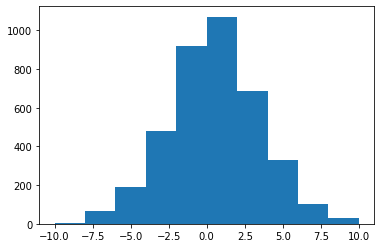

<IPython.core.display.Javascript object>

In [88]:
plt.hist(trust_pivot["diff"])

(0.9894266128540039, 1.971703574632757e-16)
DescribeResult(nobs=3877, minmax=(-10.0, 10.0), mean=0.011606912561258705, variance=8.95729558538048, skewness=0.03528643248856201, kurtosis=0.1187968970964901)


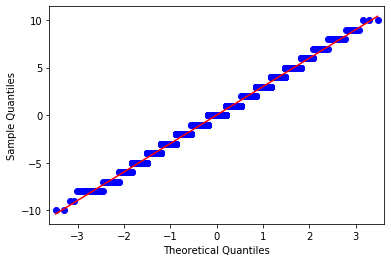

<IPython.core.display.Javascript object>

In [93]:
print(stats.shapiro(trust_pivot["diff"]))
print(stats.describe(trust_pivot["diff"]))
qqplot(trust_pivot["diff"], line="s")
plt.show()

^probably normal

In [94]:
# stats.wilcoxon(trust_pivot["6"] - trust_pivot["7"])

<IPython.core.display.Javascript object>

In [95]:
stats.ttest_rel(trust_pivot["6"], trust_pivot["7"])

Ttest_relResult(statistic=0.24147721605831796, pvalue=0.8091980464994594)

<IPython.core.display.Javascript object>

Seems like you can't say there was a significant difference in trust at the .05 alpha level.

**2. Did people become happier from 2012 to 2014?**


Might as well make a pivot table the rest of the questions:

In [78]:
df_piv = df.pivot(
    index="id_co", columns="year", values=["ppltrst", "happy", "sclmeet", "sclact"]
)

<IPython.core.display.Javascript object>

In [79]:
df_piv.head()

ppltrst       happy       sclmeet      sclact     
year         6     7     6     7       6    7      6    7
id_co                                                    
CH1001     4.0   7.0   9.0   9.0     3.0  6.0    3.0  3.0
CH1004     NaN  10.0   NaN  10.0     NaN  5.0    NaN  2.0
CH1009     7.0   8.0   9.0  10.0     5.0  7.0    3.0  3.0
CH1016     4.0   6.0   9.0  10.0     5.0  3.0    3.0  2.0
CH1017     4.0   5.0  10.0   7.0     1.0  5.0    1.0  3.0

<IPython.core.display.Javascript object>

In [98]:
#dfs=[df_piv["ppltrst"], df_piv["happy"], df_piv["sclmeet"], df_piv["sclact"]]
#for q in dfs:
#    q["diff"] = q["6"] - q["7"]


/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>

separate them into their own tables:

In [116]:
# df_piv["ppltrst"]["diff"] = df_piv["ppltrst"]["7"] - df_piv["ppltrst"]["6"]
# df_piv.head()
happy = df_piv["happy"]
happy["diff"] = happy["7"] - happy["6"]
happy = happy.dropna()
happy.head()

trust = df_piv["ppltrst"]
trust["diff"] = trust["7"] - trust["6"]
trust = trust.dropna()
trust.head()

sclmeet = df_piv["sclmeet"]
sclmeet["diff"] = sclmeet["7"] - sclmeet["6"]
sclmeet = sclmeet.dropna()
sclmeet.head()

sclact = df_piv["sclact"]
sclact["diff"] = sclact["7"] - sclact["6"]
sclact = sclact.dropna()
sclact.head()

/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/jamesmoss/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

year,6,7,diff
id_co,,,
CH1001,3.0,3.0,0.0
CH1009,3.0,3.0,0.0
CH1016,3.0,2.0,-1.0
CH1017,1.0,3.0,2.0
CH1027,5.0,3.0,-2.0


<IPython.core.display.Javascript object>

In [111]:
happy = happy.dropna()
happy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3877 entries, CH1001 to SE997
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       3877 non-null   float64
 1   7       3877 non-null   float64
 2   diff    3877 non-null   float64
dtypes: float64(3)
memory usage: 121.2+ KB


<IPython.core.display.Javascript object>

Plot/see if the difference in happiness is normal. NOTE I am subtracting 2012 values from 2014 from now on.

(array([   3.,   24.,   98.,  371., 1125., 1377.,  632.,  185.,   46.,
          16.]),
 array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.]),
 <a list of 10 Patch objects>)

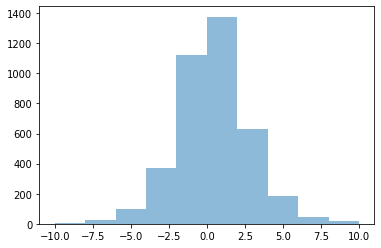

<IPython.core.display.Javascript object>

In [112]:
plt.hist(happy['diff'], alpha=0.5)


(0.9769161343574524, 1.3157978031956884e-24)
DescribeResult(nobs=3877, minmax=(-10.0, 10.0), mean=-0.04565385607428424, variance=5.699927571587939, skewness=0.09566452398264164, kurtosis=1.0009833693005072)


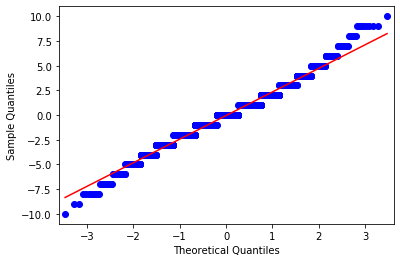

<IPython.core.display.Javascript object>

In [113]:
print(stats.shapiro(happy["diff"]))
print(stats.describe(happy["diff"]))
qqplot(happy["diff"], line="s")
plt.show()

Probably not normal. Use Wilcoxxonn for paired non-normal data:

In [114]:
stats.wilcoxon(happy["7"] - happy["6"])

WilcoxonResult(statistic=2400525.5, pvalue=0.09598021342436672)

<IPython.core.display.Javascript object>

Looks like there is barely no significant differnce in happiness, but a lot of this depends on the way you interpret the scale.

***3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?***

In [137]:
df_14["cntry"].value_counts()

ES    1134
SE     867
CH     743
NO     712
CZ     606
DE      14
Name: cntry, dtype: int64

<IPython.core.display.Javascript object>

****

don't really need this cell below:

In [135]:
sclmeet["id_co"] = sclmeet.index
sclmeet["country"] = sclmeet["id_co"].str[0:2]
sclmeet = sclmeet.drop(columns=["id_co"])

<IPython.core.display.Javascript object>

****

In [146]:
sweden14 = df_14[df_14["cntry"] == "SE"]

<IPython.core.display.Javascript object>

In [147]:
switz14 = df_14[df_14["cntry"] == "CH"]

<IPython.core.display.Javascript object>

In [148]:
norway14 = df_14[df_14["cntry"] == "NO"]

<IPython.core.display.Javascript object>

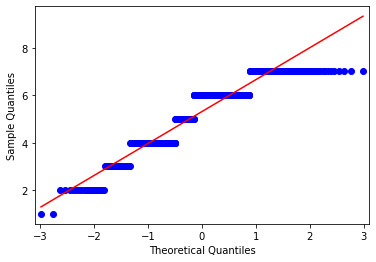

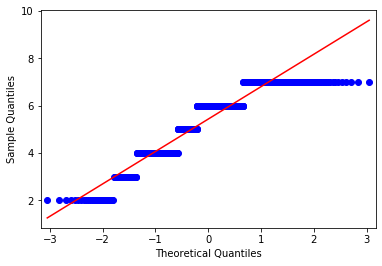

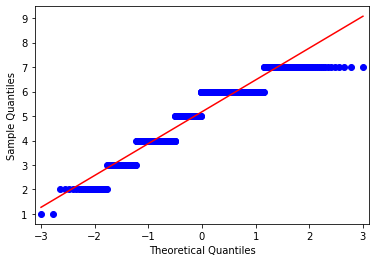

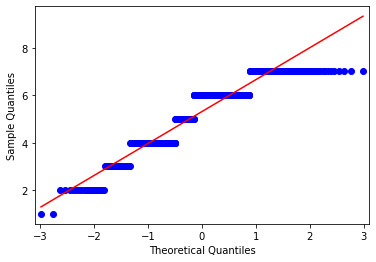

<IPython.core.display.Javascript object>

In [149]:
qqplot(sweden14["sclmeet"], line="s")
qqplot(switz14["sclmeet"], line="s")
qqplot(norway14["sclmeet"], line="s")

In [151]:
print(stats.describe(sweden14["sclmeet"]))
print(stats.describe(switz14["sclmeet"]))
print(stats.describe(norway14["sclmeet"]))

DescribeResult(nobs=867, minmax=(2, 7), mean=5.434832756632065, variance=1.8788314673784199, skewness=-0.6751138160495723, kurtosis=-0.4024683071086881)
DescribeResult(nobs=743, minmax=(1, 7), mean=5.174966352624495, variance=1.6944129031789972, skewness=-0.6382977240097087, kurtosis=-0.24036067403841654)
DescribeResult(nobs=712, minmax=(1, 7), mean=5.310393258426966, variance=1.8064741067336714, skewness=-0.6366633314784985, kurtosis=-0.33293306740001993)


<IPython.core.display.Javascript object>

^seem alright from a normality standpoint. On to variance

In [152]:
stats.bartlett(sweden14["sclmeet"], switz14["sclmeet"], norway14["sclmeet"])

BartlettResult(statistic=2.137194054536588, pvalue=0.34349008675071796)

<IPython.core.display.Javascript object>

Seems like their variance doesn't significantly differ. On to ANOVA!

In [155]:
f, p = stats.f_oneway(sweden14["sclmeet"], switz14["sclmeet"], norway14["sclmeet"])
print("f stat: ")
print(f)
print("p value: ")
print(p)

f stat: 
7.51815690614991
p value: 
0.0005564751602510602


<IPython.core.display.Javascript object>

Seems like their means differ!

Fishish this:

In [157]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

<IPython.core.display.Javascript object>

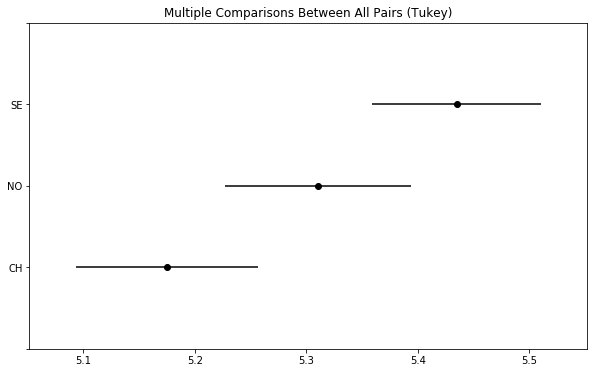

group1,group2,meandiff,p-adj,lower,upper,reject
CH,NO,0.1354,0.1316,-0.0295,0.3003,False
CH,SE,0.2599,0.001,0.1027,0.4171,True
NO,SE,0.1244,0.1586,-0.0346,0.2835,False


<IPython.core.display.Javascript object>

In [212]:
#figure out this top part

df_14_countries=df_14[df_14['cntry'].isin(['SE','CH',"NO"])]

tukey = pairwise_tukeyhsd(endog = df_14_countries['sclmeet'],      # Data
                          groups = df_14_countries['cntry'],   # Groups
                          alpha=0.05)         # Significance level

# Plot results
tukey.plot_simultaneous()
plt.show()

# Show summary table of results
tukey.summary()


I'd say De and Cz stick out. De has a high variance too.

Now do the same thing for how often people are social:

**4. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?**

In [170]:
sweden14 = df_14[df_14["cntry"] == "SE"]
switz14 = df_14[df_14["cntry"] == "CH"]
norway14 = df_14[df_14["cntry"] == "NO"]

<IPython.core.display.Javascript object>

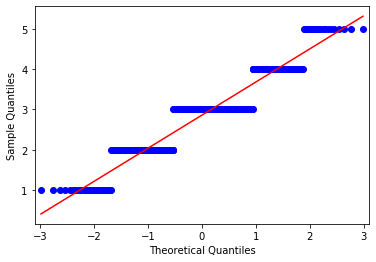

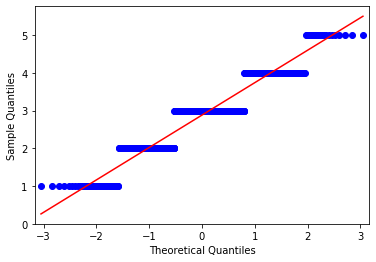

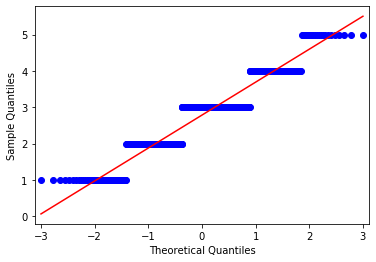

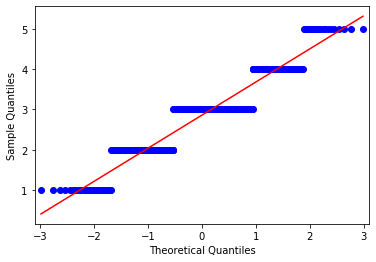

<IPython.core.display.Javascript object>

In [171]:
qqplot(sweden14["sclact"], line="s")
qqplot(switz14["sclact"], line="s")
qqplot(norway14["sclact"], line="s")

In [172]:
print(stats.describe(sweden14["sclact"]))
print(stats.describe(switz14["sclact"]))
print(stats.describe(norway14["sclact"]))

DescribeResult(nobs=867, minmax=(1, 5), mean=2.878892733564014, variance=0.7393576640002557, skewness=-0.07057138165607037, kurtosis=-0.0019064717623313854)
DescribeResult(nobs=743, minmax=(1, 5), mean=2.784656796769852, variance=0.821489336230696, skewness=0.056518838123621226, kurtosis=-0.05699247701187771)
DescribeResult(nobs=712, minmax=(1, 5), mean=2.860955056179775, variance=0.6740289037437381, skewness=0.09364724158452321, kurtosis=0.39039548364910237)


<IPython.core.display.Javascript object>

In [174]:
print(stats.shapiro(sweden14["sclact"]))
print(stats.shapiro(switz14["sclact"]))
print(stats.shapiro(norway14["sclact"]))

(0.8822527527809143, 4.1179254157732173e-25)
(0.8914050459861755, 1.883037234053481e-22)
(0.8651995658874512, 2.9663917244412476e-24)


<IPython.core.display.Javascript object>

^Seems like they're probably not normal. So we use K-W:

In [175]:
stats.kruskal(sweden14["sclact"], switz14["sclact"], norway14["sclact"])

KruskalResult(statistic=5.69420648561302, pvalue=0.058012124753642015)

<IPython.core.display.Javascript object>

At least one median is significantly different than the others at a=.1 on to seeing which:

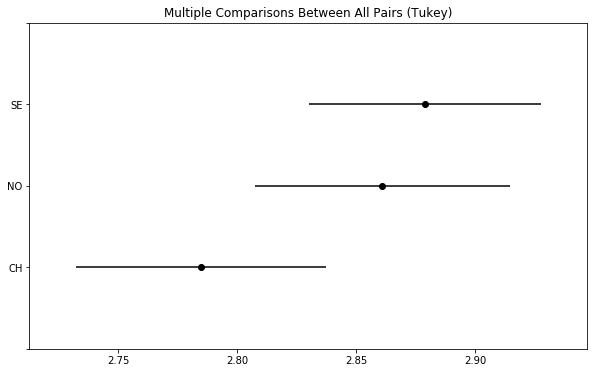

group1,group2,meandiff,p-adj,lower,upper,reject
CH,NO,0.0763,0.2114,-0.0299,0.1825,False
CH,SE,0.0942,0.0744,-0.007,0.1955,False
NO,SE,0.0179,0.9,-0.0845,0.1204,False


<IPython.core.display.Javascript object>

In [213]:
tukey = pairwise_tukeyhsd(endog = df_14_countries['sclact'],      # Data
                          groups = df_14_countries['cntry'],   # Groups
                          alpha=0.05)         # Significance level

# Plot results
tukey.plot_simultaneous()
plt.show()

# Show summary table of results
tukey.summary()


They aren't statistically different form each other in a paired fashion

All countries, just for fun:

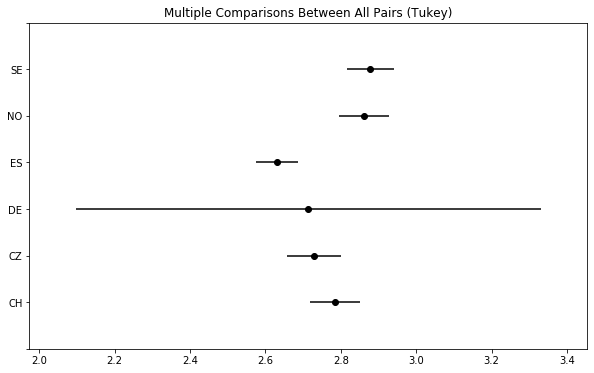

group1,group2,meandiff,p-adj,lower,upper,reject
CH,CZ,-0.0553,0.8502,-0.1935,0.0829,False
CH,DE,-0.0704,0.9,-0.7514,0.6107,False
CH,ES,-0.1533,0.0034,-0.2724,-0.0341,True
CH,NO,0.0763,0.5601,-0.0561,0.2087,False
CH,SE,0.0942,0.2726,-0.032,0.2205,False
CZ,DE,-0.0151,0.9,-0.6976,0.6674,False
CZ,ES,-0.098,0.2382,-0.225,0.0291,False
CZ,NO,0.1316,0.0779,-0.008,0.2711,False
CZ,SE,0.1495,0.018,0.0158,0.2832,True
DE,ES,-0.0829,0.9,-0.7618,0.596,False


<IPython.core.display.Javascript object>

In [176]:
tukey = pairwise_tukeyhsd(endog = df_14['sclact'],      # Data
                          groups = df_14['cntry'],   # Groups
                          alpha=0.05)         # Significance level

# Plot results
tukey.plot_simultaneous()
plt.show()

# Show summary table of results
tukey.summary()


**PART 2**

**1.Is there a significant difference in the number of unique designs drawn by the same participants from measurement 2 to measurement 3?**


In [177]:
data_url2 = "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv"
df4 = pd.read_csv(data_url2)

<IPython.core.display.Javascript object>

In [178]:
df4.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


<IPython.core.display.Javascript object>

In [179]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Casenr         7545 non-null   int64  
 1   Age            7545 non-null   int64  
 2   Gender         7545 non-null   object 
 3   Education      7545 non-null   object 
 4   Measurement    7545 non-null   object 
 5   Unique         7545 non-null   float64
 6   Perseverative  7545 non-null   float64
 7   Interval       7545 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 471.7+ KB


<IPython.core.display.Javascript object>

In [181]:
df4.Measurement.value_counts()

Measurement 1 (2003-2006)    2515
Measurement 3 (2008-2012)    2515
Measurement 2 (2006-2008)    2515
Name: Measurement, dtype: int64

<IPython.core.display.Javascript object>

In [182]:
df4_m1=df4[df4['Measurement']=='Measurement 1 (2003-2006)']
df4_m2=df4[df4['Measurement']=='Measurement 2 (2006-2008)']
df4_m2=df4[df4['Measurement']=='Measurement 3 (2008-2012)']


<IPython.core.display.Javascript object>

In [183]:
df4_pivot = df4.pivot(index="Casenr", columns="Measurement", values="Unique")
df4_pivot.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


<IPython.core.display.Javascript object>

In [201]:
df4_pivot["12"] = (
    df4_pivot["Measurement 1 (2003-2006)"] - df4_pivot["Measurement 2 (2006-2008)"]
)
df4_pivot["23"] = (
    df4_pivot["Measurement 2 (2006-2008)"] - df4_pivot["Measurement 3 (2008-2012)"]
)
df4_pivot["13"] = (
    df4_pivot["Measurement 1 (2003-2006)"] - df4_pivot["Measurement 3 (2008-2012)"]
)

<IPython.core.display.Javascript object>

(0.9935351014137268, 4.253681407107024e-09)
DescribeResult(nobs=2515, minmax=(-68.5, 75.5), mean=-4.015506958250497, variance=342.2368318331855, skewness=0.15837265462838976, kurtosis=0.7823714353134701)


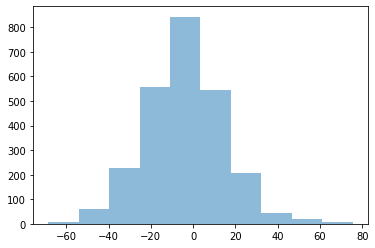

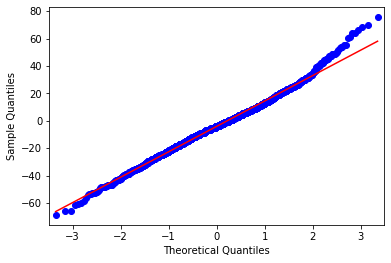

<IPython.core.display.Javascript object>

In [202]:
plt.hist(df4_pivot["23"], alpha=0.5)
print(stats.shapiro(df4_pivot["23"]))
print(stats.describe(df4_pivot["23"]))
qqplot(df4_pivot["23"], line="s")
plt.show()

Seems normal, so use paired t test:

In [203]:
stats.ttest_rel(
    df4_pivot["Measurement 3 (2008-2012)"], df4_pivot["Measurement 2 (2006-2008)"]
)

Ttest_relResult(statistic=10.88544039426271, pvalue=5.3585747477799544e-27)

<IPython.core.display.Javascript object>

You can see a significant difference; 3 is bigger

**2.Is there a significant difference in the number of perseverative errors drawn by the same participants from measurement 2 to measurement 3?**


Basically do the same thing

In [204]:
persev_piv = df4.pivot(index="Casenr", columns="Measurement", values="Perseverative")
persev_piv.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


<IPython.core.display.Javascript object>

In [205]:
persev_piv["12"] = (
    persev_piv["Measurement 1 (2003-2006)"] - persev_piv["Measurement 2 (2006-2008)"]
)
persev_piv["23"] = (
    persev_piv["Measurement 2 (2006-2008)"] - persev_piv["Measurement 3 (2008-2012)"]
)
persev_piv["13"] = (
    persev_piv["Measurement 1 (2003-2006)"] - persev_piv["Measurement 3 (2008-2012)"]
)

<IPython.core.display.Javascript object>

(0.8027888536453247, 0.0)
DescribeResult(nobs=2515, minmax=(-116.0, 109.0), mean=-0.33021868787276343, variance=229.4045359505655, skewness=0.4731668345755776, kurtosis=11.932957016082534)


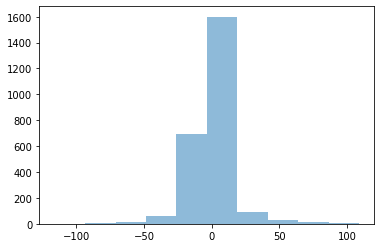

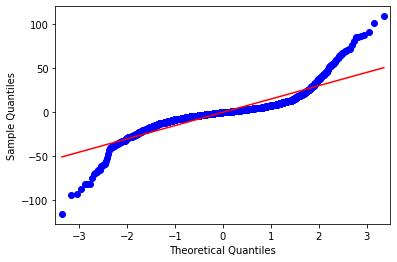

<IPython.core.display.Javascript object>

In [206]:
plt.hist(persev_piv["23"], alpha=0.5)
print(stats.shapiro(persev_piv["23"]))
print(stats.describe(persev_piv["23"]))
qqplot(persev_piv["23"], line="s")
plt.show()

^Looks like it's not normal, so use wilcoxon

In [207]:
stats.wilcoxon(
    persev_piv["Measurement 3 (2008-2012)"], persev_piv["Measurement 2 (2006-2008)"]
)

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)

<IPython.core.display.Javascript object>

^reject null that there is no significant difference between sample medians